# Modelos de clasificación

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Métricas de rendimiento para modelos de clasificación binarios

El rendimiento de los sistemas de clasificación binarios se puede realizar mediante la utilización de las siguientes métricas. Algunas de las más utilizadas son:

* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$
* Exactitud (Precision): $P = \frac{TP}{TP + FP}$
* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$
* F1: F1 = $\frac{P R}{P + R}$
* Área bajo la curva ROC (ROC AUC)

donde $TP$, $FP$, $TN$, y $FN$ son las componentes de la matriz de confusión

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

La matriz de confusión es 
[[4 1]
 [2 3]]
Precisión: 0.7
Exactitud: 0.75
Exhaustividad: 0.6
F1: 0.666666666667
AUC: 0.7


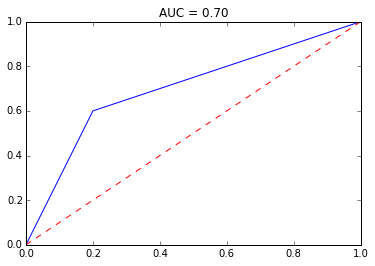

In [2]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)
  
# Ejemplo de resultado
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

metricas_modelos(y_true, y_pred)

# Conjunto de datos de ejemplo

In [3]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_samples   = 2500,
                           n_features  = 3,
                           n_redundant = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

# Creación de modelos de clasificación

## Regresión logística

La clasificación binaria de eventos se puede realizar a partir de un modelo regresión logística donde se utiliza la expresión
$$
F(x) = \frac{1}{1 + e^{-x}}
$$

La matriz de confusión es 
[[795 127]
 [ 76 877]]
Precisión: 0.891733333333
Exactitud: 0.873505976096
Exhaustividad: 0.920251836306
F1: 0.896269800715
AUC: 0.8912539008


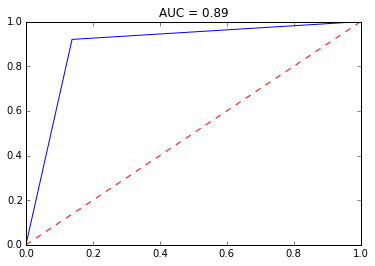

In [4]:
from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[288  38]
 [ 24 275]]
Precisión: 0.9008
Exactitud: 0.878594249201
Exhaustividad: 0.919732441472
F1: 0.898692810458
AUC: 0.901584012147


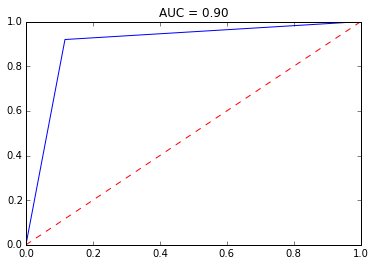

In [5]:
y_pred     = classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

# Arboles de decisión

En los arboles de decisión se construyen diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.

La matriz de confusión es 
[[922   0]
 [  0 953]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


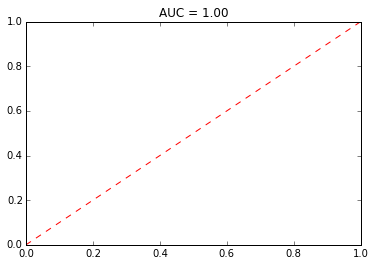

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

El resultado es muy bueno, se ha de probar en el conjunto de datos de validación.

La matriz de confusión es 
[[302  24]
 [ 30 269]]
Precisión: 0.9136
Exactitud: 0.918088737201
Exhaustividad: 0.899665551839
F1: 0.908783783784
AUC: 0.913022959969


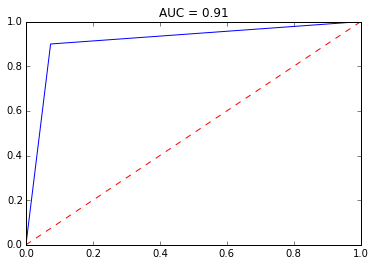

In [7]:
y_pred     = dt_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

## Sobre aprendizaje
En los arboles de clasificación hay que tener cuidado con el sobre aprendizaje, para evitar esto hay que reducir la profundidad del albol.

La matriz de confusión es 
[[838  84]
 [ 73 880]]
Precisión: 0.916266666667
Exactitud: 0.912863070539
Exhaustividad: 0.923399790136
F1: 0.918101199791
AUC: 0.916146749732


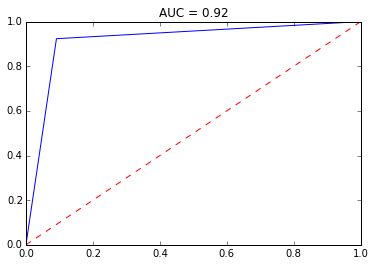

In [8]:
dt_classifier = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[298  28]
 [ 24 275]]
Precisión: 0.9168
Exactitud: 0.907590759076
Exhaustividad: 0.919732441472
F1: 0.913621262458
AUC: 0.91692143546


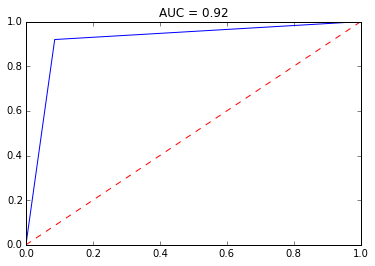

In [9]:
y_pred     = dt_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

## Importancia de las características
En los arboles de decisión se puede evaluar la importacia de las características. Esto permite determinar cuales son las características más importantes para determinar veracidad de la clase.

In [10]:
print dt_classifier.feature_importances_

[ 0.          0.14839544  0.85160456]


La matriz de confusión es 
[[851  71]
 [478 475]]
Precisión: 0.7072
Exactitud: 0.869963369963
Exhaustividad: 0.498426023085
F1: 0.633755837225
AUC: 0.710709757746


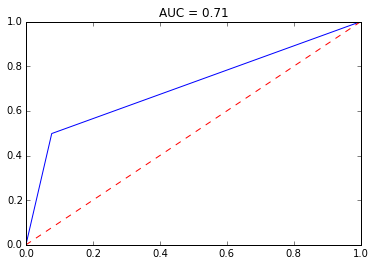

In [11]:
dt_classifier = DecisionTreeClassifier(max_depth = 2).fit(X_train[:,[0, 1]], y_train)
y_pred        = dt_classifier.predict(X_train[:,[0, 1]])

metricas_modelos(y_train, y_pred)

# Random forest
Random forest es una combinación de árboles de decision tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos

La matriz de confusión es 
[[921   1]
 [  7 946]]
Precisión: 0.995733333333
Exactitud: 0.998944033791
Exhaustividad: 0.992654774397
F1: 0.995789473684
AUC: 0.995785087849


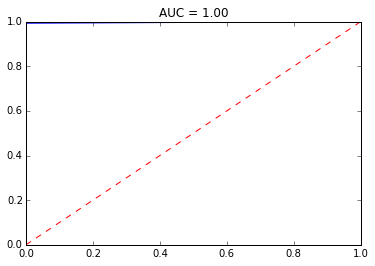

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred        = rf_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[309  17]
 [ 27 272]]
Precisión: 0.9296
Exactitud: 0.941176470588
Exhaustividad: 0.909698996656
F1: 0.925170068027
AUC: 0.928775878696


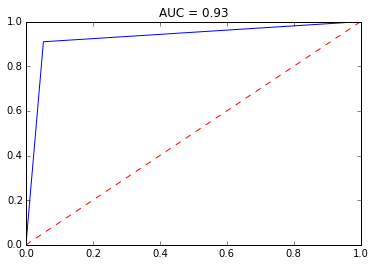

In [13]:
y_pred     = rf_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

La matriz de confusión es 
[[830  92]
 [ 66 887]]
Precisión: 0.915733333333
Exactitud: 0.906026557712
Exhaustividad: 0.93074501574
F1: 0.918219461698
AUC: 0.91548096774


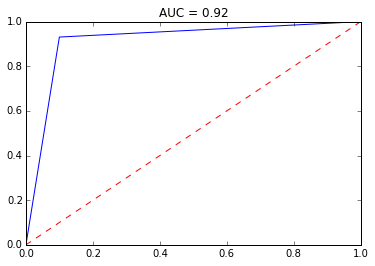

In [14]:
dt_classifier = RandomForestClassifier(max_depth = 2).fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[309  17]
 [ 27 272]]
Precisión: 0.9296
Exactitud: 0.941176470588
Exhaustividad: 0.909698996656
F1: 0.925170068027
AUC: 0.928775878696


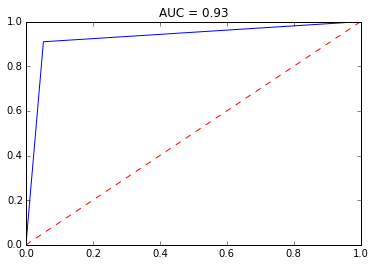

In [15]:
y_pred     = rf_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

# Support vector machines (Máquinas de vectores de soporte)

La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.

La matriz de confusión es 
[[850  72]
 [ 54 899]]
Precisión: 0.9328
Exactitud: 0.925849639547
Exhaustividad: 0.94333683106
F1: 0.934511434511
AUC: 0.932622862385


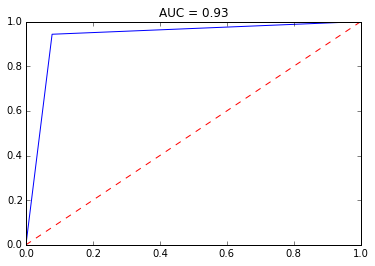

In [16]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(X_train, y_train)
y_pred         = svm_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[302  24]
 [ 23 276]]
Precisión: 0.9248
Exactitud: 0.92
Exhaustividad: 0.923076923077
F1: 0.921535893155
AUC: 0.924728645588


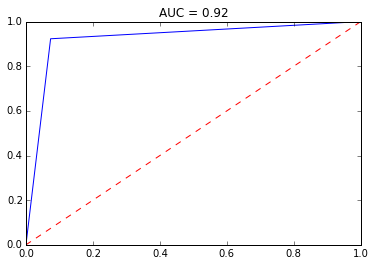

In [17]:
y_pred     = svm_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

# Naïve Bayes

Un Clasificador Bayesiano Ingenuo (Naive Bayes) es un clasificador probabilístico que se basa en el teorema de Bayes y alguno hipótesis simplificadoras adicionales.

La matriz de confusión es 
[[763 159]
 [ 72 881]]
Precisión: 0.8768
Exactitud: 0.847115384615
Exhaustividad: 0.92444910808
F1: 0.884094330156
AUC: 0.875998957511


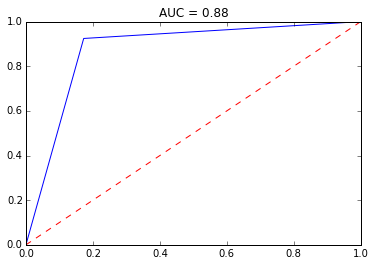

In [18]:
from sklearn import naive_bayes

nb_classifier = naive_bayes.GaussianNB().fit(X_train, y_train)
y_pred        = nb_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[272  54]
 [ 25 274]]
Precisión: 0.8736
Exactitud: 0.835365853659
Exhaustividad: 0.916387959866
F1: 0.874003189793
AUC: 0.875371894044


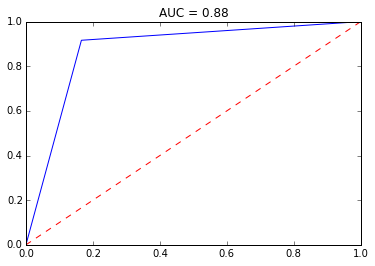

In [19]:
y_pred     = nb_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)